In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

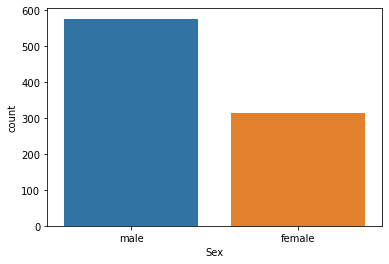

In [4]:
sns.countplot(data=data,x='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

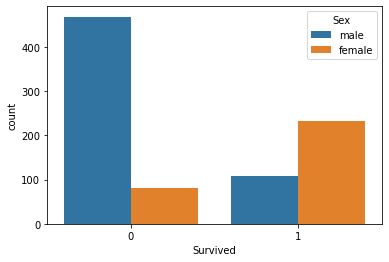

In [5]:
sns.countplot(data=data,x='Survived',hue='Sex')

In [6]:
data[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

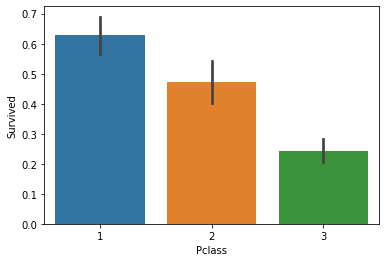

In [9]:
sns.barplot(data=data,x='Pclass',y='Survived')

In [10]:
data[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

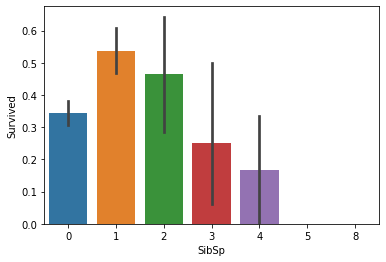

In [11]:
sns.barplot(data=data,x='SibSp',y='Survived')

In [12]:
data[['Survived','SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

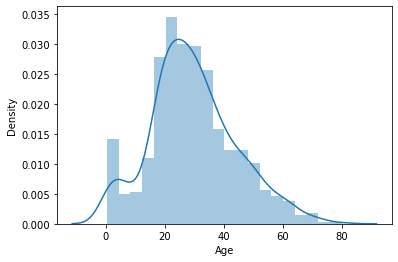

In [13]:
sns.distplot(data['Age'])

<AxesSubplot:>

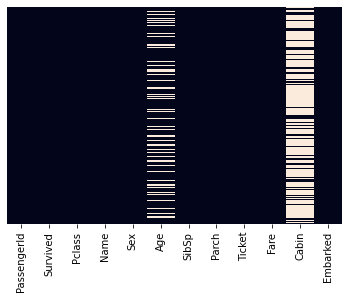

In [14]:
sns.heatmap(pd.isnull(data),cbar=False,yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

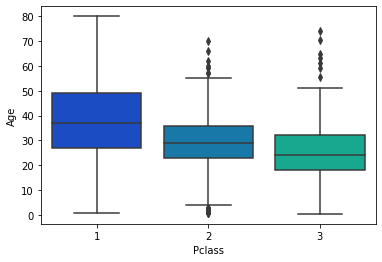

In [15]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [16]:
data[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [17]:
def fill(cols):
    age=cols[0]
    cls=cols[1]
    if pd.isnull(age):
        if cls==1:
            return 35
        if cls==2:
            return 29
        else: return 24
    else: return age

In [18]:
data['Age']=data[['Age','Pclass']].apply(fill,axis=1)

In [19]:
data=data.drop('Cabin',axis=1)

<AxesSubplot:>

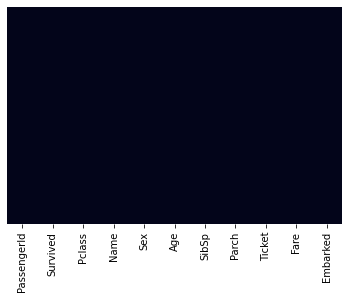

In [20]:
sns.heatmap(pd.isnull(data),cbar=False,yticklabels=False)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
sex={'male':1,'female':0}

In [23]:
data['Sex']=data['Sex'].map(sex)

In [24]:
emb=pd.get_dummies(data=data['Embarked'],drop_first=True)
Pclass=pd.get_dummies(data=data['Pclass'],drop_first=True)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [26]:
data=pd.concat([data,emb,Pclass],axis=1)

In [27]:
data=data.drop(['Embarked','Pclass'],axis=1)

In [28]:
data=data.drop(['Ticket','Name'],axis=1)

In [29]:
data.columns

Index(['PassengerId',    'Survived',         'Sex',         'Age',
             'SibSp',       'Parch',        'Fare',           'Q',
                 'S',             2,             3],
      dtype='object')

In [30]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                   y, test_size=0.30, 
                                                    random_state=124)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
ml=LogisticRegression()

In [35]:
ml.fit(X_train,y_train)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pre=ml.predict(X_test)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [37]:
from sklearn.metrics import classification_report

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,pre)

array([[144,  20],
       [ 35,  69]], dtype=int64)